BP- Salary_hike -> Build a prediction model for Salary_hike


In [21]:
# Importing Librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
data = pd.read_csv("sd.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [9]:
cor = np.corrcoef(data['YearsExperience'],data['Salary'])
cor

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

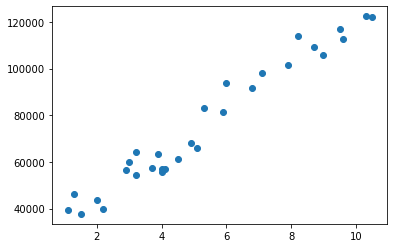

In [10]:
plt.scatter(data['YearsExperience'],data['Salary'])

In [11]:
# Model building - Linear Regression
import statsmodels.formula.api as smf
from ml_metrics import mse

In [14]:
ols = smf.ols(('data.Salary~data.YearsExperience'),data=data).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            data.Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.14e-20
Time:                        13:01:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
data.YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
ypred = ols.predict(data.YearsExperience)
ypred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [17]:
# Evaluating using RMSE
err = np.sqrt(np.mean((data.YearsExperience-ypred)**2))
err

80440.84508275457

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=1/3,random_state=0)

In [22]:
reg = LinearRegression().fit(x_train,y_train)

In [23]:
ypred = reg.predict(x_train)
ypred

array([ 81442.86638526,  82400.49997082,  60374.92750297,  55586.75957517,
       111129.50753759,  44095.15654846,  35476.45427843,  92934.46941197,
        71866.53052967,  63247.82825964])

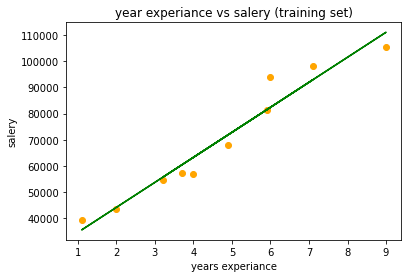

In [27]:

plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train,ypred,color='green')
plt.title('year experiance vs salery (training set)')
plt.xlabel('years experiance')
plt.ylabel('salery')
plt.show()